## HW 2

### Ahmad Hojatimalekshah

### Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *

### Q.1

### Newton's Function

In [2]:
def Newton(f,g,a,eps):
    i=0
    while abs(g(a))>eps:
        a = a+f(a)
        i+=1
        print('Number of iteration = {}'.format(i))
        print('X = {}'.format(a))
    print('The maximum of f(x) with respect to x is achieved at {}'.format(a))
    return a

#### h Function

In [3]:
x = sym.Symbol('x')
fprime = sym.diff((sym.log(x))/(1+x))
fzegond = sym.diff(fprime)
h = -fprime/fzegond
f = lambdify(x, h, 'numpy')
g = lambdify(x,fprime, 'numpy')
h

(log(x)/(x + 1)**2 - 1/(x*(x + 1)))/(2*log(x)/(x + 1)**3 - 2/(x*(x + 1)**2) - 1/(x**2*(x + 1)))

#### Newton's method for starting point = 3

In [4]:
Newton(f,g,3,1e-6)

Number of iteration = 1
X = 3.4177980946159363
Number of iteration = 2
X = 3.5740451974549705
Number of iteration = 3
X = 3.590946123623657
Number of iteration = 4
X = 3.591121458061283
The maximum of f(x) with respect to x is achieved at 3.591121458061283


3.591121458061283

#### Figure 2.3 on page 27

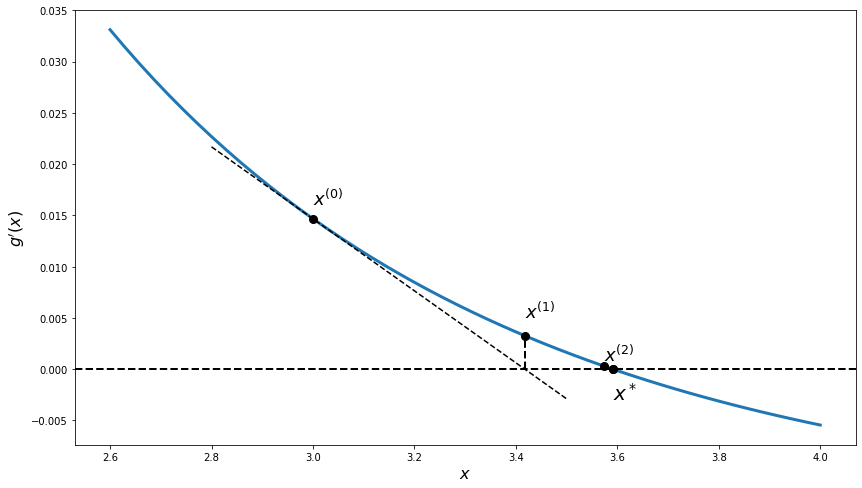

In [5]:
x = np.linspace(2.6,4)
y = g(x)
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.axhline(y=0,linewidth=2,color='k', linestyle='--')
plt.ylabel('$g^\prime(x)$',weight='bold',fontsize=16)
plt.xlabel('$x$',weight='bold',fontsize=16)
plt.text(3.591121458061283, -0.003, r'$x^*$', fontsize=20)
plt.text(3, 0.016, r'$x^{(0)}$', fontsize=18)
plt.text(3.4177980946159363, 0.005, r'$x^{(1)}$', fontsize=18)
plt.plot([3.4177980946159363,3.4177980946159363],[0,0.0032581708664204956],linewidth=2,color='k',linestyle='--')
plt.text(3.5740451974549705, 0.0008, r'$x^{(2)}$', fontsize=18)
plt.plot([3,3.4177980946159363,3.5740451974549705, 3.590946123623657, 3.591121458061283], 
         [0.014670065291576467,0.0032581708664204956,0.0002914145913424579,2.961968419805394e-06,0], 'ko',markersize =8)
dx = np.linspace(2.8, 3.5, 1000)
plt.plot(dx, -0.03511281042356601*dx+0.12,color='k',linestyle='--');


### Q.2

#### Define Log-likelihood function

In [6]:
def loglikelihood(func,x0,theta0,n):
    L = np.zeros(n)
    for i in range(0,n):
        L[i] = log(np.prod(func(x0,theta0[i])))
    return L


In [7]:
x0= np.array([3.91,4.85,2.28,4.06,3.7,4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47,4.82, 2.46, 2.99, 2.54, 0.52, 2.5])
theta0 = np.linspace(-1 * np.pi,1 * np.pi, num=1000)
x = sym.Symbol('x')
theta = sym.Symbol('t')
f = 1-cos(x-theta)
f_x = lambdify([x,theta], f, 'numpy')

#### a.

#### Log-likelihood function graph

Text(0, 0.5, '$loglikelihood$')

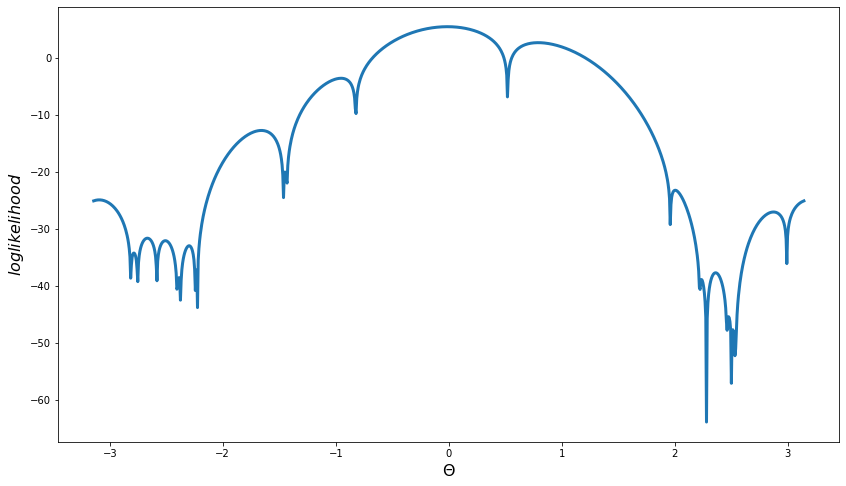

In [8]:
x = theta0
y = loglikelihood(f_x,x0,theta0,len(theta0))
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel('$loglikelihood$',weight='bold',fontsize=16)

#### b.

$$\bar{X} = \frac{1}{2{\pi}}\int_{0}^{2{\pi}} x [1-\cos({x-{\theta}})]dx = \frac{1}{2{\pi}} [\frac{x^{2}}{2}-\cos({x-{\theta}})-x\sin({x-{\theta}})]_0^{2{\pi}}$$

$$ = \frac{1}{2{\pi}} [(\frac{{4{\pi}}^{2}}{2}-\cos({{2{\pi}}-{\theta}})-{2{\pi}}\sin({{2{\pi}}-{\theta}})) - (0 - \cos(-{\theta})-0)] = {\pi}-{\sin({\theta})} $$

$$ \Rightarrow \hat{\theta}=\arcsin({\pi}-\bar{X})$$

In [9]:
print('\u03B8 = {}'.format(np.arcsin(np.pi-np.mean(x0))))

θ = -0.05844060614042408


#### C.

#### Define log-likelihood function

In [10]:
def lglklihd(x0):
    l = 1
    t = sym.Symbol('t')
    for i in range(0,len(x0)):
        l *= (1-cos(x0[i]-t))/(2*np.pi) 
    return log(l)

In [11]:
f_t = lglklihd(x0)
t = sym.Symbol('t')
fprime = sym.diff(f_t)
fzegond = sym.diff(fprime)
h = -fprime/fzegond
f = lambdify(t, h, 'numpy')
g = lambdify(t,fprime, 'numpy')

#### Newton's method for moment estimate of $\theta$ as a starting point

In [12]:
Newton(f,g,-0.05844060614042408,1e-6)

Number of iteration = 1
X = -0.01138502201825297
Number of iteration = 2
X = -0.01197186810409362
Number of iteration = 3
X = -0.011972002287433066
The maximum of f(x) with respect to x is achieved at -0.011972002287433066


-0.011972002287433066

#### Newton's method for $\theta = 2.7$

In [13]:
Newton(f,g,2.7,1e-6)

Number of iteration = 1
X = 2.8257244845697205
Number of iteration = 2
X = 2.8775491083014466
Number of iteration = 3
X = 2.8731844561150166
Number of iteration = 4
X = 2.873094549039563
Number of iteration = 5
X = 2.873094514245082
The maximum of f(x) with respect to x is achieved at 2.873094514245082


2.873094514245082

#### Newton's method for $\theta = -2.7$

In [14]:
Newton(f,g,-2.7,1e-6)

Number of iteration = 1
X = -2.674113655831202
Number of iteration = 2
X = -2.6667939270675705
Number of iteration = 3
X = -2.666699927129553
The maximum of f(x) with respect to x is achieved at -2.666699927129553


-2.666699927129553

#### d.

#### Lets define $\theta$ between $-\pi$ and $\pi$

In [15]:
theta1 = np.linspace(-1 * np.pi,1 * np.pi, num=200)

#### MLE per each starting point ($\theta$)

In [16]:
rt = np.zeros(len(theta1))
for i in range(0,len(theta1)):
    rt[i] = Newton(f,g,theta1[i],1e-6)

Number of iteration = 1
X = -3.097735864318482
Number of iteration = 2
X = -3.093110149627987
Number of iteration = 3
X = -3.0930917301637906
The maximum of f(x) with respect to x is achieved at -3.0930917301637906
Number of iteration = 1
X = -3.0934232848012573
Number of iteration = 2
X = -3.0930918123368505
Number of iteration = 3
X = -3.09309172991195
The maximum of f(x) with respect to x is achieved at -3.09309172991195
Number of iteration = 1
X = -3.0931768945100404
Number of iteration = 2
X = -3.0930917353073437
The maximum of f(x) with respect to x is achieved at -3.0930917353073437
Number of iteration = 1
X = -3.0924526657181963
Number of iteration = 2
X = -3.0930920266195328
Number of iteration = 3
X = -3.0930917299120098
The maximum of f(x) with respect to x is achieved at -3.0930917299120098
Number of iteration = 1
X = -3.08745349619873
Number of iteration = 2
X = -3.0931110409601095
Number of iteration = 3
X = -3.0930917301887617
The maximum of f(x) with respect to x is ach

Number of iteration = 2
X = -1.875720367237957
Number of iteration = 3
X = -1.6467414157967843
Number of iteration = 4
X = -1.6578357437987774
Number of iteration = 5
X = -1.658282588431373
Number of iteration = 6
X = -1.658283229901242
The maximum of f(x) with respect to x is achieved at -1.658283229901242
Number of iteration = 1
X = -1.9981371443891867
Number of iteration = 2
X = -1.7536245423847974
Number of iteration = 3
X = -1.6419001762108412
Number of iteration = 4
X = -1.6573636825782567
Number of iteration = 5
X = -1.6582805155100406
Number of iteration = 6
X = -1.658283229879002
The maximum of f(x) with respect to x is achieved at -1.658283229879002
Number of iteration = 1
X = -1.9290456823486544
Number of iteration = 2
X = -1.678959471169502
Number of iteration = 3
X = -1.6570438558338507
Number of iteration = 4
X = -1.6582782920069339
Number of iteration = 5
X = -1.6582832298246022
The maximum of f(x) with respect to x is achieved at -1.6582832298246022
Number of iteration 

X = -0.9533006618212286
Number of iteration = 5
X = -0.9533363202723105
Number of iteration = 6
X = -0.9533363277328706
The maximum of f(x) with respect to x is achieved at -0.9533363277328706
Number of iteration = 1
X = -1.0921872265059585
Number of iteration = 2
X = -0.9164408680563924
Number of iteration = 3
X = -0.9441770349510515
Number of iteration = 4
X = -0.952824744574203
Number of iteration = 5
X = -0.9533347895199045
Number of iteration = 6
X = -0.953336327718995
The maximum of f(x) with respect to x is achieved at -0.953336327718995
Number of iteration = 1
X = -1.0374801352115872
Number of iteration = 2
X = -0.9290225974741223
Number of iteration = 3
X = -0.9495183160855404
Number of iteration = 4
X = -0.9532494048508254
Number of iteration = 5
X = -0.9533362834095563
Number of iteration = 6
X = -0.953336327732858
The maximum of f(x) with respect to x is achieved at -0.953336327732858
Number of iteration = 1
X = -0.9919172909345575
Number of iteration = 2
X = -0.94621537908

Number of iteration = 3
X = -0.011971658181603286
Number of iteration = 4
X = -0.01197200228739409
The maximum of f(x) with respect to x is achieved at -0.01197200228739409
Number of iteration = 1
X = -0.12613724297034828
Number of iteration = 2
X = -0.010478991243781682
Number of iteration = 3
X = -0.011971128951366476
Number of iteration = 4
X = -0.01197200228714414
The maximum of f(x) with respect to x is achieved at -0.01197200228714414
Number of iteration = 1
X = -0.09917729675989212
Number of iteration = 2
X = -0.010635779372253684
Number of iteration = 3
X = -0.01197130347040375
Number of iteration = 4
X = -0.011972002287250585
The maximum of f(x) with respect to x is achieved at -0.011972002287250585
Number of iteration = 1
X = -0.07683813947297252
Number of iteration = 2
X = -0.011013403342179207
Number of iteration = 3
X = -0.011971643534939031
Number of iteration = 4
X = -0.011972002287390012
The maximum of f(x) with respect to x is achieved at -0.011972002287390012
Number o

Number of iteration = 6
X = 0.5782105540245721
Number of iteration = 7
X = 0.6278932082035948
Number of iteration = 8
X = 0.7005457527495018
Number of iteration = 9
X = 0.766687541385987
Number of iteration = 10
X = 0.7891924344895224
Number of iteration = 11
X = 0.790596751553216
Number of iteration = 12
X = 0.790601310362453
The maximum of f(x) with respect to x is achieved at 0.790601310362453
Number of iteration = 1
X = 0.5827478709187502
Number of iteration = 2
X = 0.6353816344638564
Number of iteration = 3
X = 0.7095996316828168
Number of iteration = 4
X = 0.7716762259135513
Number of iteration = 5
X = 0.7897322359337464
Number of iteration = 6
X = 0.7905995787142835
Number of iteration = 7
X = 0.7906013104031151
The maximum of f(x) with respect to x is achieved at 0.7906013104031151
Number of iteration = 1
X = 0.6376070497298166
Number of iteration = 2
X = 0.712190384644296
Number of iteration = 3
X = 0.7729818014412966
Number of iteration = 4
X = 0.7898510228046343
Number of it

Number of iteration = 5
X = 0.7906013103549786
The maximum of f(x) with respect to x is achieved at 0.7906013103549786
Number of iteration = 1
X = 0.9575331252527423
Number of iteration = 2
X = 0.7570094058434129
Number of iteration = 3
X = 0.7877399317384984
Number of iteration = 4
X = 0.7905824182369684
Number of iteration = 5
X = 0.7906013095938902
The maximum of f(x) with respect to x is achieved at 0.7906013095938902
Number of iteration = 1
X = 0.9961575957560042
Number of iteration = 2
X = 0.7480027962690192
Number of iteration = 3
X = 0.7858781601403356
Number of iteration = 4
X = 0.7905495289640947
Number of iteration = 5
X = 0.790601304278508
The maximum of f(x) with respect to x is achieved at 0.790601304278508
Number of iteration = 1
X = 1.0382939708709873
Number of iteration = 2
X = 0.7405890303755331
Number of iteration = 3
X = 0.7839533676463146
Number of iteration = 4
X = 0.7904980962908781
Number of iteration = 5
X = 0.790601286045
Number of iteration = 6
X = 0.79060131

Number of iteration = 3
X = 2.235995611770357
Number of iteration = 4
X = 2.236217219934951
Number of iteration = 5
X = 2.236219387032041
Number of iteration = 6
X = 2.2362193872328033
The maximum of f(x) with respect to x is achieved at 2.2362193872328033
Number of iteration = 1
X = 2.2406950823491623
Number of iteration = 2
X = 2.2356025097435537
Number of iteration = 3
X = 2.236202560531503
Number of iteration = 4
X = 2.2362193751204815
Number of iteration = 5
X = 2.236219387232788
The maximum of f(x) with respect to x is achieved at 2.236219387232788
Number of iteration = 1
X = 2.297826646457071
Number of iteration = 2
X = 2.3135470800926816
Number of iteration = 3
X = 2.336605519598368
Number of iteration = 4
X = 2.3559962678064656
Number of iteration = 5
X = 2.3606083859155493
Number of iteration = 6
X = 2.360718124597478
Number of iteration = 7
X = 2.3607181737318284
The maximum of f(x) with respect to x is achieved at 2.3607181737318284
Number of iteration = 1
X = 2.34446093423

Number of iteration = 2
X = 3.189703971965746
Number of iteration = 3
X = 3.190093463241436
Number of iteration = 4
X = 3.190093577267632
The maximum of f(x) with respect to x is achieved at 3.190093577267632
Number of iteration = 1
X = 3.185449442861105
Number of iteration = 2
X = 3.190075157551599
Number of iteration = 3
X = 3.190093577015796
The maximum of f(x) with respect to x is achieved at 3.190093577015796


#### Maximum Likelihood estimation for $\theta$ between $-\pi$ and $\pi$

In [17]:
rt

array([-3.09309173, -3.09309173, -3.09309174, -3.09309173, -3.09309173,
       -3.09309173, -3.09309173, -3.09309173, -3.09309173, -3.09309173,
       -3.09309173, -2.78616675, -2.78616675, -2.66669993, -2.66669993,
       -2.66669993, -2.66669993, -2.66669993, -2.50761323, -2.50761323,
       -2.50761323, -2.50761323, -2.50761323, -2.50761323, -2.38820049,
       -2.29725622, -2.29725622, -2.29725622, -2.29725622, -2.23216729,
       -1.65828323, -1.65828323, -1.65828323, -1.65828323, -1.65828323,
       -1.65828323, -1.65828323, -1.65828323, -1.65828323, -1.65828323,
       -1.65828323, -1.65828323, -1.65828323, -1.65828323, -1.65828323,
       -1.65828323, -1.65828323, -1.65828323, -1.65828322, -1.65828323,
       -1.65828323, -1.65828323, -1.65828323, -1.65828323, -1.44747877,
       -0.95333633, -0.95333633, -0.95333633, -0.95333633, -0.95333633,
       -0.95333633, -0.95333633, -0.95333633, -0.95333633, -0.95333633,
       -0.95333633, -0.95333633, -0.95333633, -0.95333633, -0.95

#### Lets plot the the roots achieved ny Newton's method per each $\theta$

Text(0, 0.5, '$MLE$')

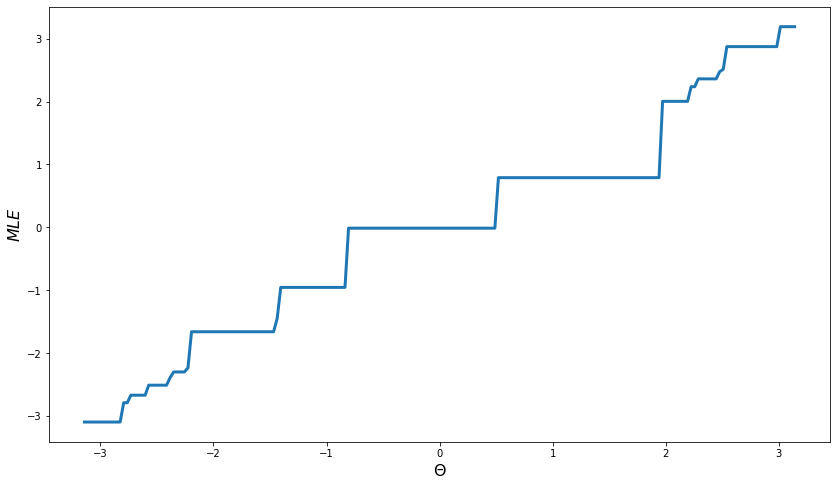

In [18]:
x = theta1
y = rt
plt.figure(figsize=(14,8))
plt.plot(x,y,linewidth=3)
plt.xlabel('${\Theta}$',weight='bold',fontsize=16)
plt.ylabel('$MLE$',weight='bold',fontsize=16)

- For different starting values we have different maximum which means there are many local maxima for the likelihood function.

#### e.

- According to the above profile for the theta close to 2 ([1.95, 2.05]), we have two different values.

In [19]:
Newton(f,g,2.05,1e-6)

Number of iteration = 1
X = 1.9794860283806885
Number of iteration = 2
X = 1.9906110668111099
Number of iteration = 3
X = 2.0000039755219663
Number of iteration = 4
X = 2.003375183415004
Number of iteration = 5
X = 2.0036434422109015
Number of iteration = 6
X = 2.00364488873332
The maximum of f(x) with respect to x is achieved at 2.00364488873332


2.00364488873332

In [20]:
Newton(f,g,1.95,1e-6)

Number of iteration = 1
X = 1.9380882287187915
Number of iteration = 2
X = 1.9076892091319206
Number of iteration = 3
X = 1.817057805551511
Number of iteration = 4
X = 1.541418689697936
Number of iteration = 5
X = 1.00923340297352
Number of iteration = 6
X = 0.7453886398284963
Number of iteration = 7
X = 0.7852409508857239
Number of iteration = 8
X = 0.7905344793239373
Number of iteration = 9
X = 0.7906013001960189
The maximum of f(x) with respect to x is achieved at 0.7906013001960189


0.7906013001960189